# [1] 다이아몬드 데이터 구조
이 클래식 데이터세트에는 거의 54,000개에 달하는 다이아몬드의 가격과 기타 속성이 포함되어 있다.

컷, 색상, 투명도, 가격 및 기타 속성을 기준으로 다이아몬드를 분석합니다.

> https://www.kaggle.com/datasets/shivam2503/diamonds

| 변수 | 의미 | 기타 |
|---|---|---|
| carat | 무게 | ex) 3캐럿짜리 다이아몬드 |
| cut | 세공의 질 | 다이아몬드의 단면을 어떻게 커팅하였는지에 대한 상태값을 분류<br/>'계층이 있는 범주형(factor)' 데이터<br/>"Fair", "Good", "Very Good", "Premium", "Ideal"로 나누어진다. |
| color | 색깔 | 총 7개의 컬러로 표기된 범주형 데이터<br/>J (worst) to D (best)|
| clarity | 투명도 | 범주형 데이터<br/>I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best) |
| depth | 깊이 | 수치형 데이터 |
| table | 넓은 폭 대비 꼭대기의 넓이 | 수치형 데이터 |
| price | 가격(미국 달러, ($326--$18,823) | 수치형 데이터 |
| x | 길이(mm)(0--10.74) | 수치형 데이터 |
| y | 넓이(mm)(0--58.9) | 수치형 데이터 |
|  z | 깊이(mm)(0--31.8) | 수치형 데이터 |


# [2] 데이터 가져오기

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

from pandas import read_csv
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

origin = "/content/diamonds.csv"
df = pd.read_csv(origin)
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [12]:
# 불필요한열 제거
df = df.drop(columns='Unnamed: 0')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# [3] 탐색적 데이터 분석 및 전처리

In [13]:
df.shape

(53940, 10)

In [14]:
df.size

539400

In [15]:
df.duplicated().sum()

146

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

0

In [18]:
df.isna().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [19]:
number = df.select_dtypes(include=np.number).columns.to_list()
category = df.select_dtypes(exclude=np.number).columns.to_list()

In [20]:
df.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [21]:
# x,y,z값의 제로값 제거
df = df.drop(df[df['x']==0].index)
df = df.drop(df[df['y']==0].index)
df = df.drop(df[df['z']==0].index)
df.shape

(53775, 10)

In [22]:
df.describe(include='object')

,cut,color,clarity
count,53775,53775,53775
unique,5,7,8
top,Ideal,G,SI1
freq,21485,11254,13030


In [23]:
for i in category:
    print(df[i].value_counts())
    print()
    print('-'*30)

cut
Ideal        21485
Premium      13737
Very Good    12068
Good          4888
Fair          1597
Name: count, dtype: int64

------------------------------
color
G    11254
E     9776
F     9517
H     8266
D     6754
I     5406
J     2802
Name: count, dtype: int64

------------------------------
clarity
SI1     13030
VS2     12225
SI2      9142
VS1      8155
VVS2     5056
VVS1     3646
IF       1784
I1        737
Name: count, dtype: int64

------------------------------


### Normal Test

왜도(skew)와 첨도(kurtosis)를 통해 정규성을 검정한다.

West 등(1995)의 연구에 따르면 정규분포 기준은 $|왜도| < 2$, $|첨도| < 7$이면 정규분포에서 크게 벗어나지 않아 정규성을 충족한다고 볼 수 있다.

Shapiro 검정에 비해 느슨한 기준이기 때문에 많은 논문에서 많이 인용되고 있다.

##### 첨도(Kurtosis)

분포의 뽀족한 정도

| 구분 | 내용 |
|---|---|
| 정규분포 | $첨도 = 0$ |
| 위로 뾰족함 | $첨도 > 0$ |
| 아래로 뾰족함 | $첨도 < 0$ |

$|첨도| < 7$인 경우 정규성을 충족하는 것으로 판단한다.

In [24]:
for i in number:
    print('The kurtosis value of',i,'is',df[i].kurt())

The kurtosis value of carat is 1.2457811079895178
The kurtosis value of depth is 5.419006676383654
The kurtosis value of table is 2.774996519742369
The kurtosis value of price is 2.1792544447759763
The kurtosis value of x is -0.7043849287510566
The kurtosis value of y is 92.29538299947419
The kurtosis value of z is 48.03544208520775


##### 왜도

분포의 비대칭도.

| 구분 | 내용 |
|---|---|
| 정규분포 | $왜도=0$ |
| 왼쪽으로 치우침 | $왜도 > 0$ |
| 오른쪽으로 치우침 | $왜도 < 0$ |

$|왜도| < 2$ 인 경우 정규성을 충족하는 것으로 판단한다.

In [25]:
for i in number:
    print('The skewness value of',i,'is',df[i].skew())

The skewness value of carat is 1.1132176108381227
The skewness value of depth is -0.11371107011617339
The skewness value of table is 0.7920686095882784
The skewness value of price is 1.6182203665466373
The skewness value of x is 0.39690785208661533
The skewness value of y is 2.470200340127712
The skewness value of z is 1.5893087544943625


### 데이터 시각화

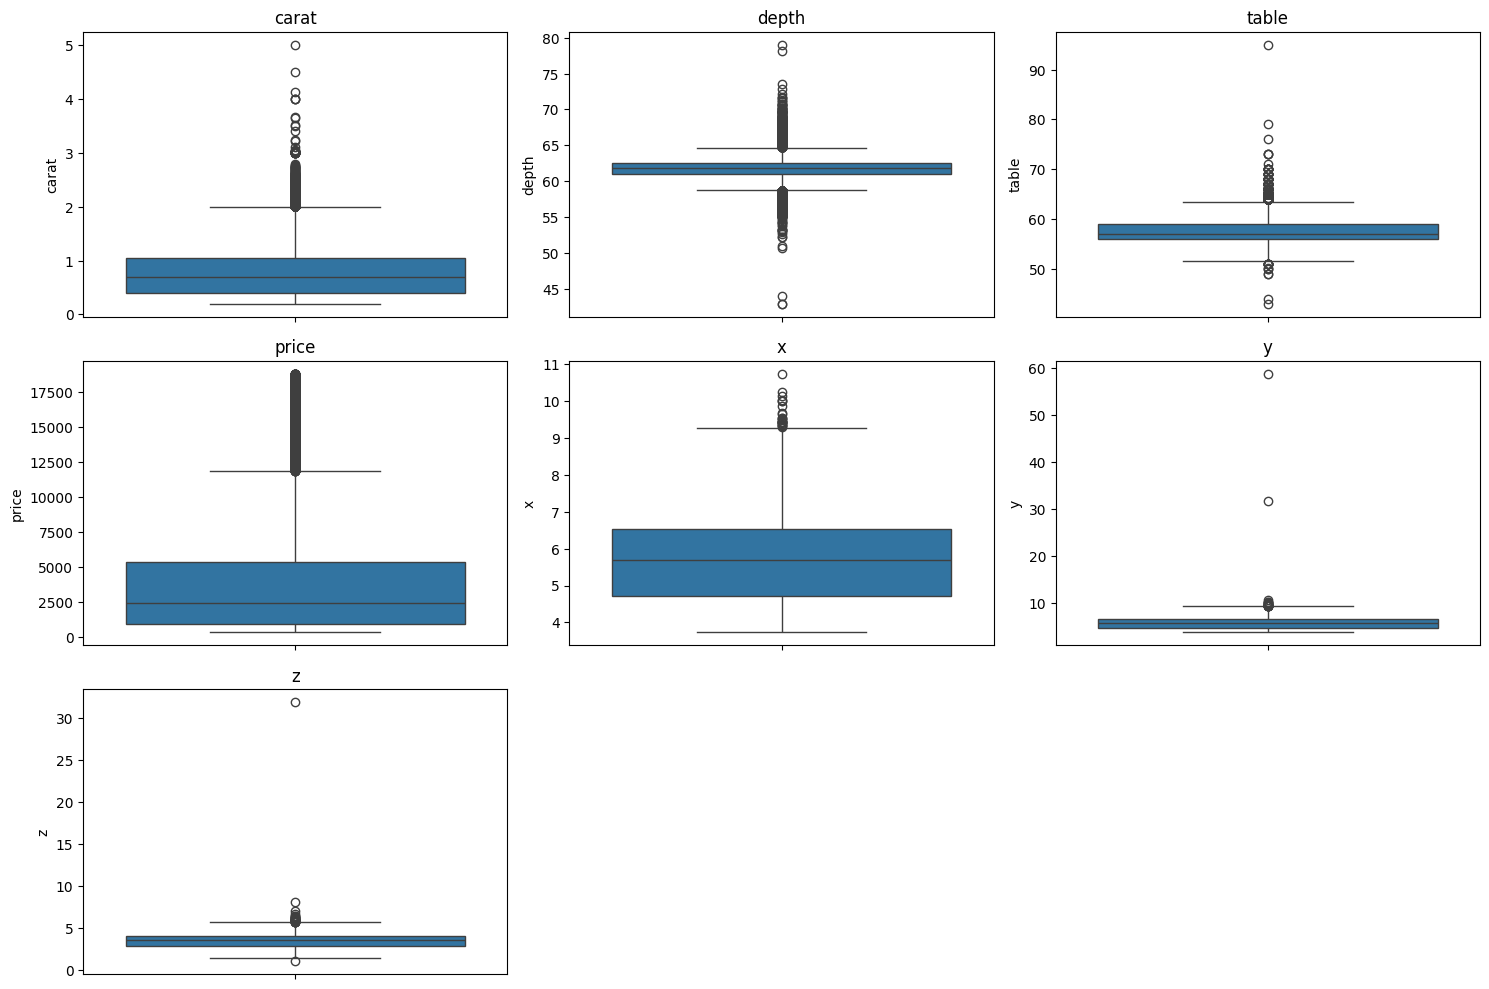

In [26]:
plt.figure(figsize=(15,10))
t = 1
for i in number:
    plt.subplot(3,3,t)
    sns.boxplot(df[i])
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

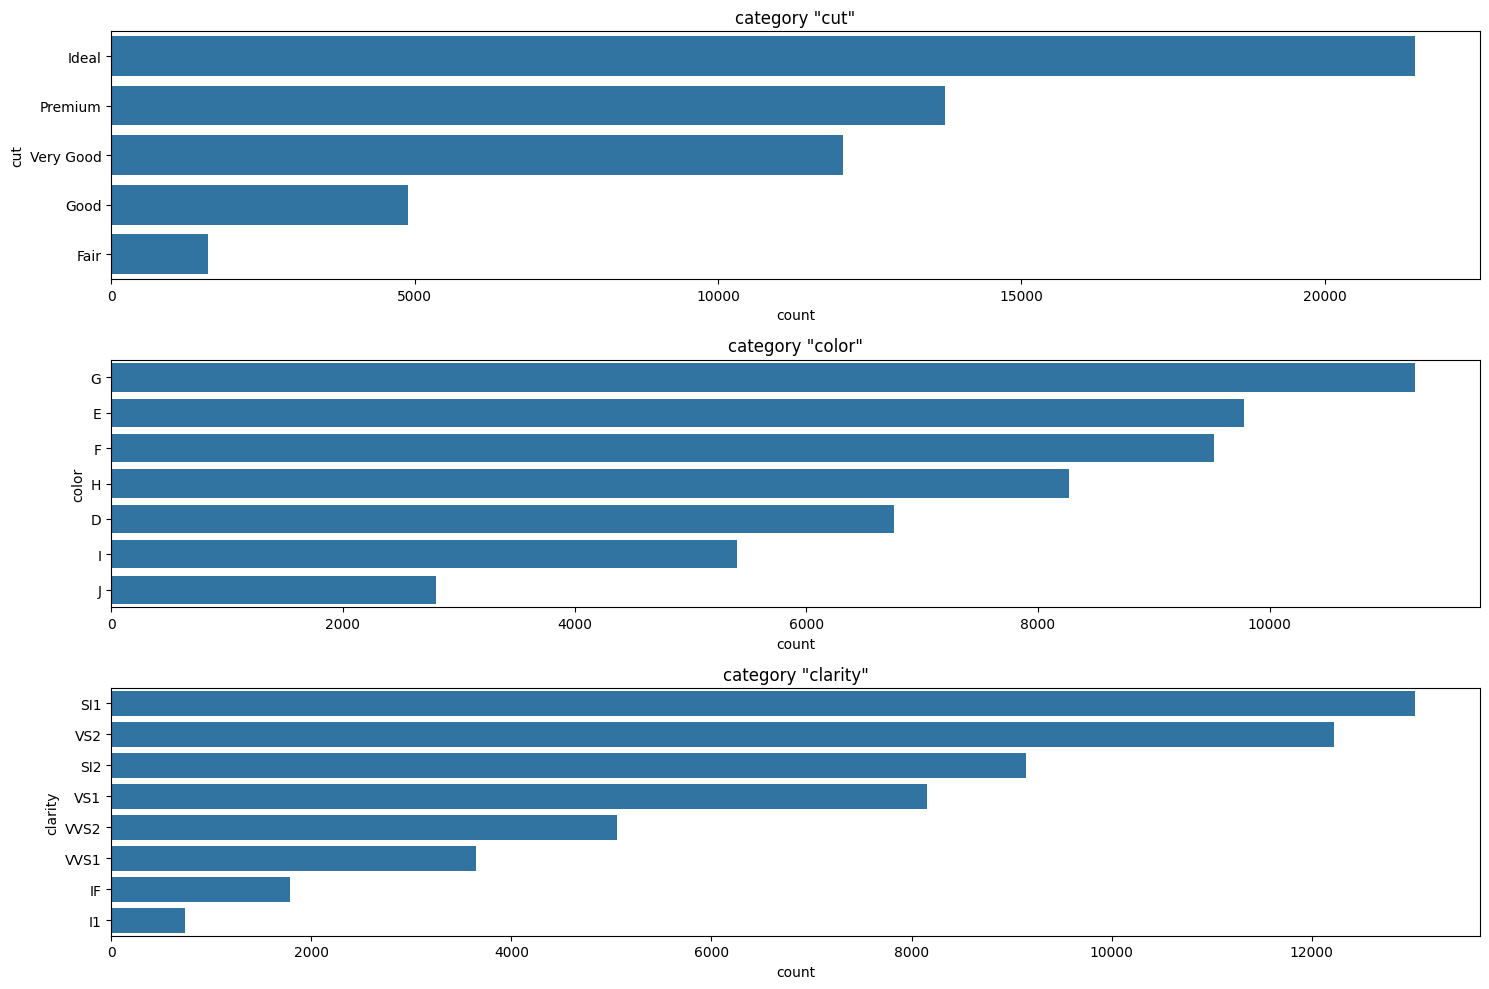

In [27]:
plt.figure(figsize=(15,10))
t = 1
for i in category:
    sorted_categories = df[i].value_counts().index
    plt.subplot(3,1,t)
    sns.countplot(y=df[i], order=sorted_categories)
    plt.title(f'category "{i}"')
    t+=1
plt.tight_layout()
plt.show()

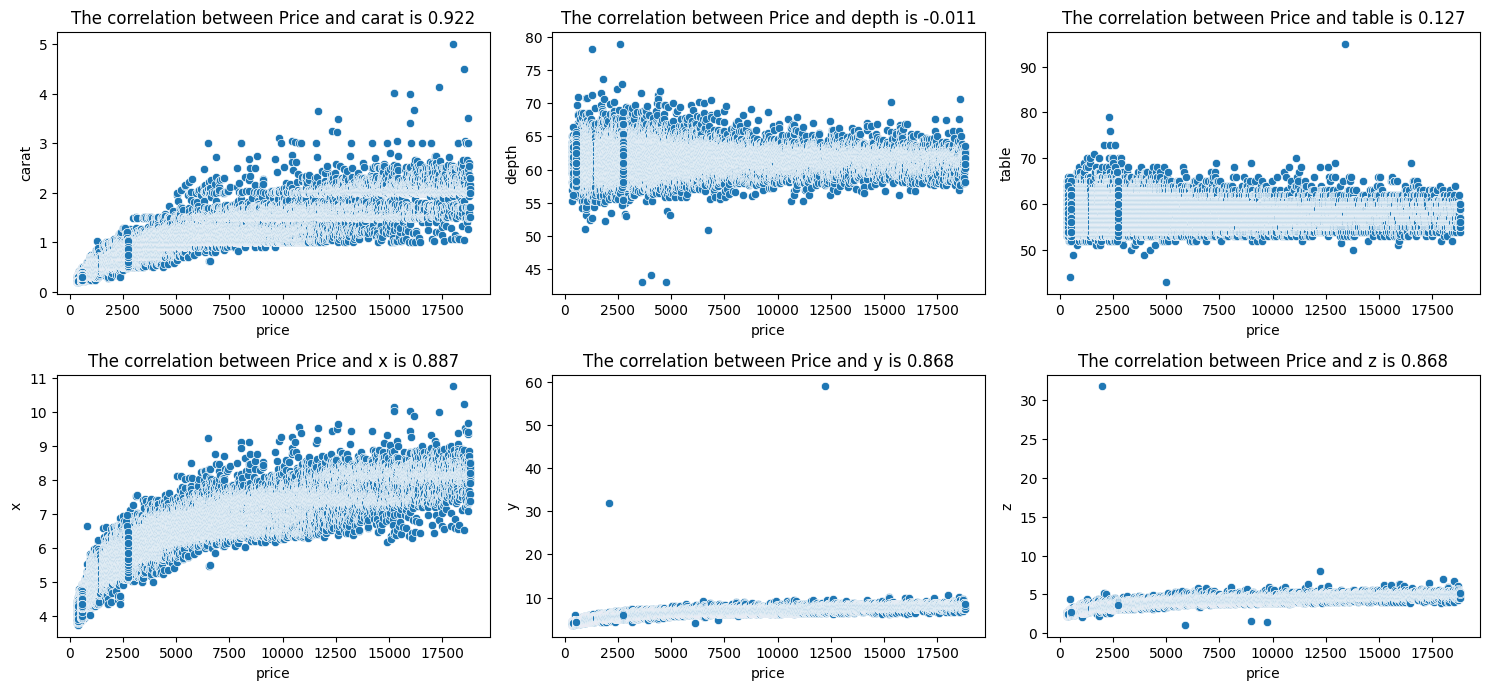

In [28]:
plt.figure(figsize=(15,10))
t = 1
for i in number:
    if i!='price':
        corr_with_price=round(df['price'].corr(df[i]),3)
        plt.subplot(3,3,t)
        sns.scatterplot(x=df['price'],y=df[i])
        plt.title(f'The correlation between Price and {i} is {corr_with_price}')
        t+=1
plt.tight_layout()
plt.show()

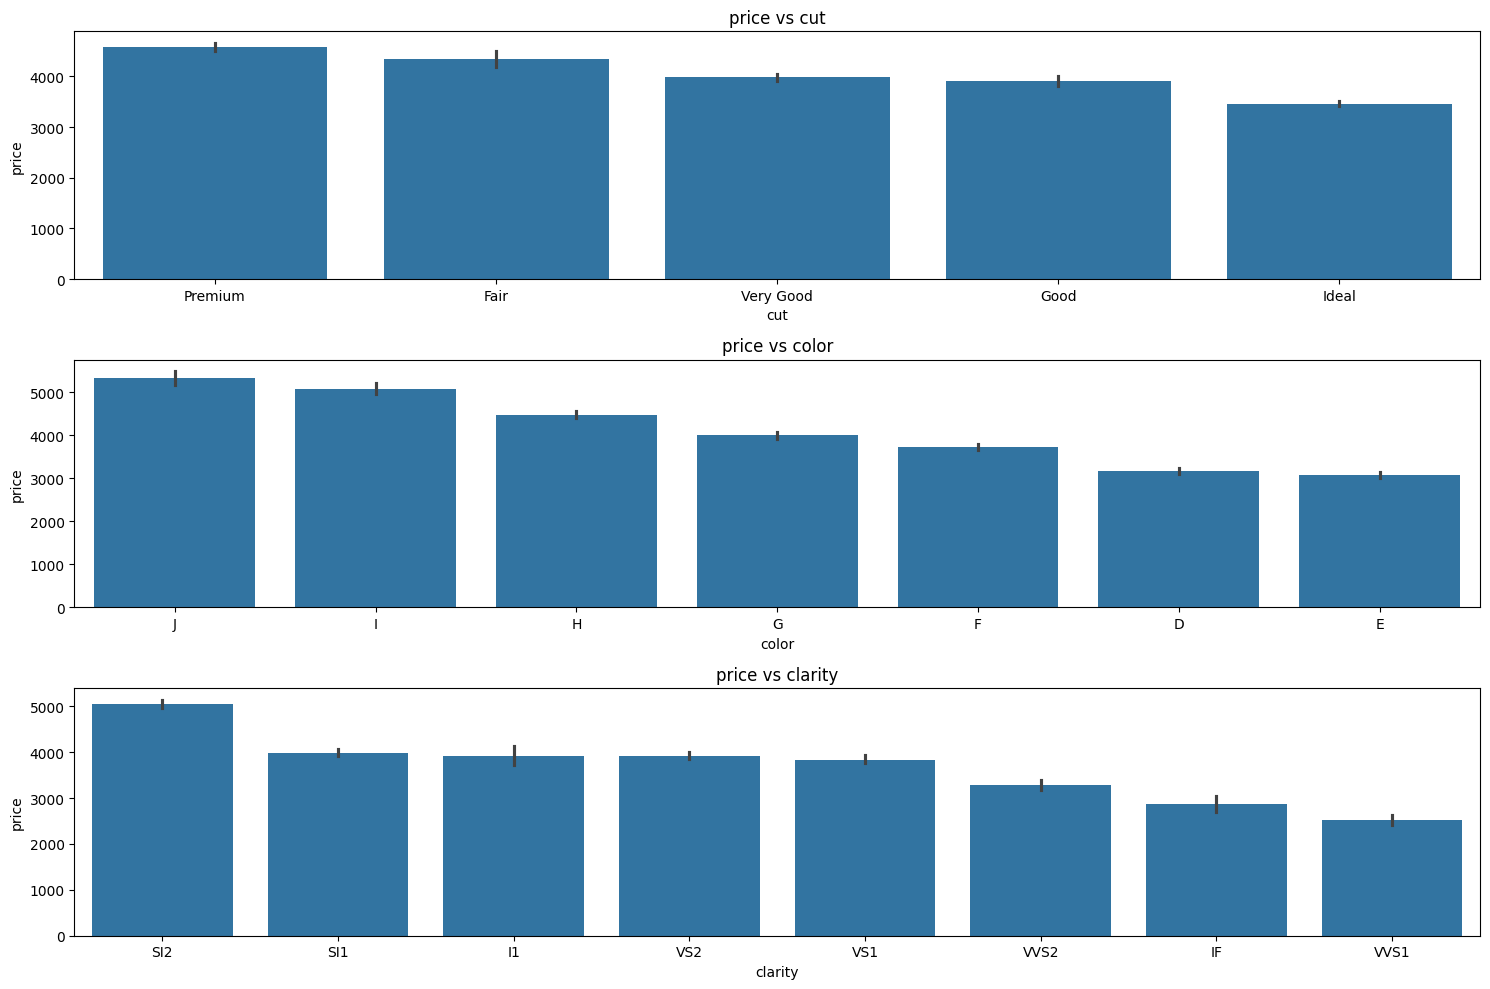

In [29]:
plt.figure(figsize=(15,10))
t = 1
for i in category:
    sorted_categories= df.groupby(i)['price'].mean().sort_values(ascending=False).reset_index()
    plt.subplot(3,1,t)
    sns.barplot(x=df[i],y=df['price'], estimator='mean', order=sorted_categories[i])
    plt.title(f'price vs {i}')
    t+=1
plt.tight_layout()
plt.show()

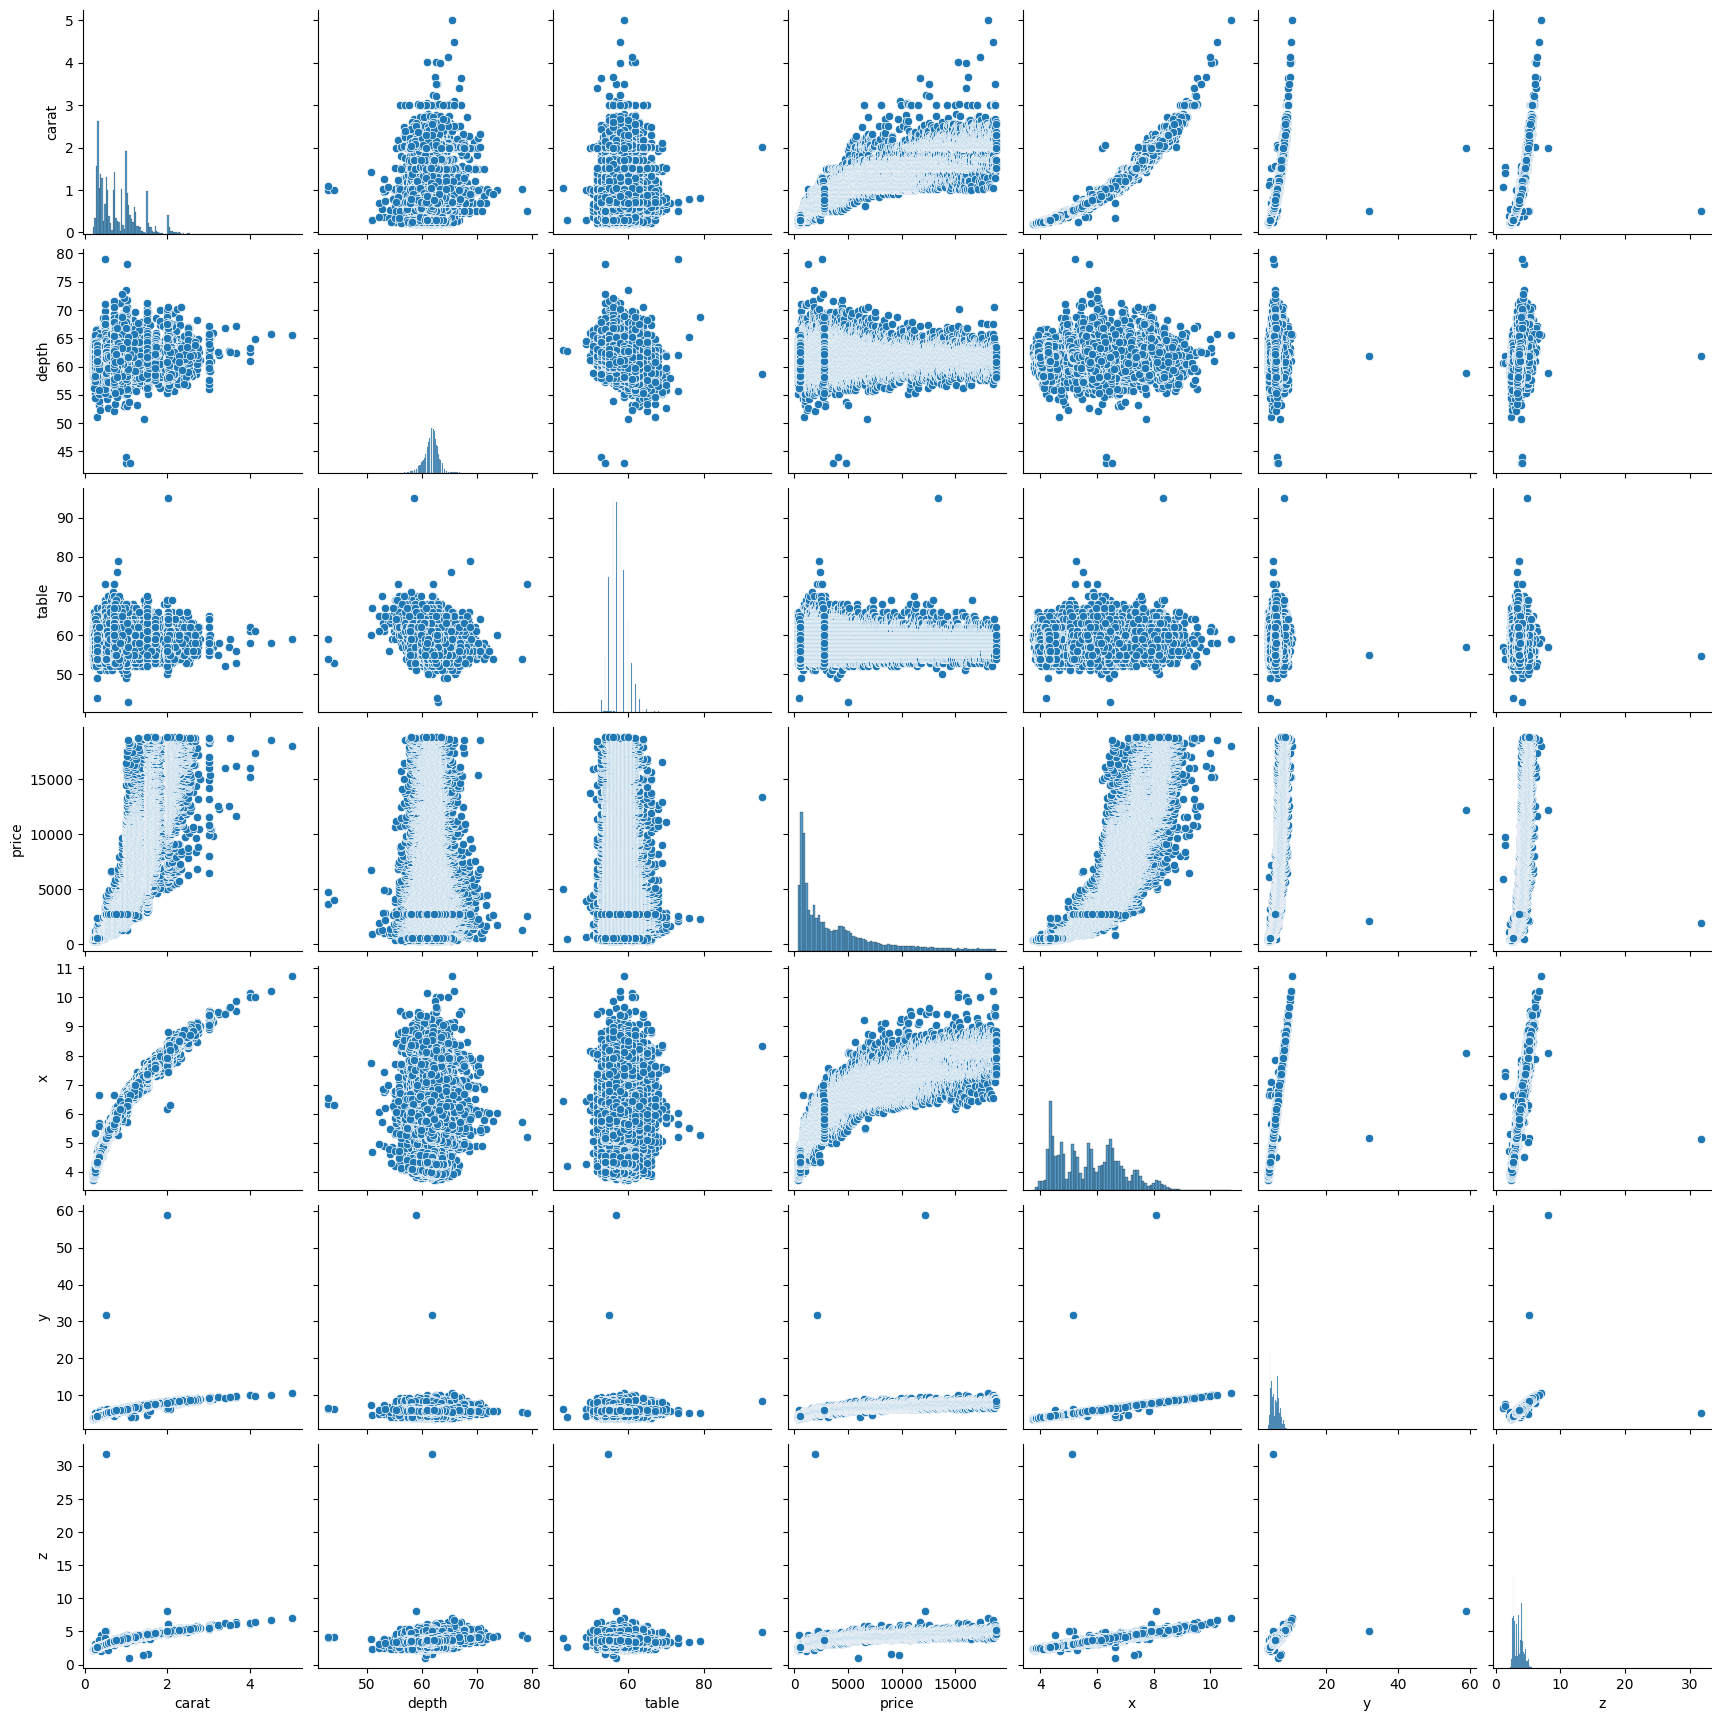

In [30]:
sns.pairplot(df)
plt.show()

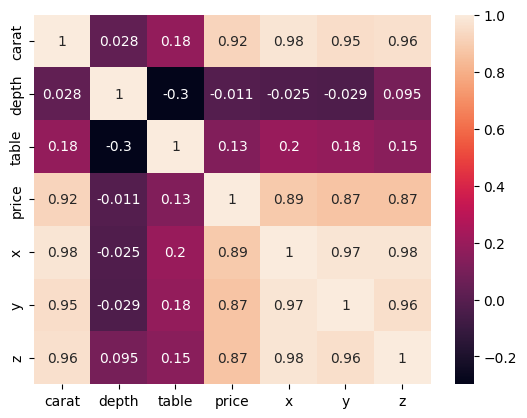

In [31]:
sns.heatmap(df[number].corr(),annot=True)
plt.show()

### 이상치 제거

In [32]:
cols = ['depth', 'table', 'x', 'y', 'z']

In [33]:
q1 = df[cols].quantile(0.25)
q3 = df[cols].quantile(0.75)
iqr = q3-q1
lw = q1-(1.5*iqr)
uw = q3+(1.5*iqr)
df = df[~((df[cols]<lw) | (df[cols]>uw)).any(axis=1)]
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### 첨도와 왜도 재확인

In [34]:
for i in number:
    print('The kurtosis value of',i,'is',df[i].kurt())

The kurtosis value of carat is 0.7366524118507214
The kurtosis value of depth is -0.005512015344716126
The kurtosis value of table is -0.2104258549073479
The kurtosis value of price is 2.170606352489278
The kurtosis value of x is -0.7665620176817569
The kurtosis value of y is -0.776394884191538
The kurtosis value of z is -0.7817634324461884


In [35]:
for i in number:
    print('The skewness value of',i,'is',df[i].skew())

The skewness value of carat is 1.0545281842352914
The skewness value of depth is -0.24785727145633726
The skewness value of table is 0.3627769301846416
The skewness value of price is 1.6179350598193931
The skewness value of x is 0.4037317323389572
The skewness value of y is 0.39782182975139435
The skewness value of z is 0.39373817295025787


### 더미변수화

명목형 변수를 연속형 변수"스럽게" 변환한 것.

카테고리 형태의 데이터를 `0,1,2`등의 연속형 숫자로 변환한 형태이다.

> ex) 남자, 여자 --> 0, 1

기존의 범주형 변수를 이진 변수로 대체하여 분석 모델에 적용할 수 있다.

일반적으로 머신러닝 알고리즘들은 연속적인 숫자를 다루는 데 더 효과적이기 때문에 더미 변수 변환이 필요함.

통계학에서는 `통제요인`이라고 부르기도 한다.

### Cut(세공의 질) - Fair to Ideal(0~4)
### Color(색깔) - J to D(0~6)
### Clarity(투명도) - I1 t0 IF(0~7)

In [36]:
df['cut'] = df['cut'].replace({'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4})
df['color'] = df['color'].replace({'J':0,'I':1,'H':2,'G':3,'F':4,'E':5,'D':6})
df['clarity'] = df['clarity'].replace({'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7})

In [37]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,0,5,62.8,57.0,336,3.94,3.96,2.48


### 데이터 표준화 및 훈련-검증용 데이터 분할
##### 종속변수를 제외한 표준화하기

In [38]:
x = df.drop(columns='price')
y = df['price']

In [39]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,random_state=10)

In [40]:
s = StandardScaler()

In [41]:
xtrain = s.fit_transform(xtrain)

In [42]:
xtest = s.transform(xtest)

In [43]:
xtrain = pd.DataFrame(xtrain, columns=x.columns)
xtest = pd.DataFrame(xtest, columns=x.columns)

In [44]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(35590, 9)
(35590,)
(15253, 9)
(15253,)


In [45]:
xtrain.describe()

,carat,cut,color,clarity,depth,table,x,y,z
count,3.559000e+04,3.559000e+04,3.559000e+04,3.559000e+04,3.559000e+04,3.559000e+04,3.559000e+04,3.559000e+04,3.559000e+04
mean,1.357598e-17,-9.662902e-17,-1.397527e-16,1.200875e-16,4.981186e-16,-2.671273e-16,-1.253782e-16,3.214312e-16,8.385163e-17
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-1.259400e+00,-2.955154e+00,-2.010204e+00,-1.881940e+00,-2.682154e+00,-2.608800e+00,-1.773034e+00,-1.832641e+00,-3.077112e+00
25%,-8.512384e-01,-9.910298e-01,-8.306941e-01,-6.670143e-01,-6.196234e-01,-6.393461e-01,-9.104560e-01,-9.105526e-01,-9.094147e-01
50%,-1.852907e-01,-8.967972e-03,-2.409394e-01,-5.955150e-02,9.777852e-02,-1.469827e-01,-2.990787e-02,-2.462463e-02,-2.196798e-02
75%,5.451037e-01,9.730939e-01,9.385700e-01,5.479113e-01,6.358300e-01,8.377440e-01,7.338329e-01,7.347422e-01,7.345440e-01
max,4.863023e+00,9.730939e-01,1.528325e+00,2.370300e+00,2.608685e+00,3.053379e+00,3.195774e+00,3.202685e+00,3.149563e+00


In [46]:
xtest.describe()

,carat,cut,color,clarity,depth,table,x,y,z
count,15253.000000,15253.000000,15253.000000,15253.000000,15253.000000,15253.000000,15253.000000,15253.000000,15253.000000
mean,-0.004784,0.016915,0.007675,-0.008216,-0.026560,0.001181,-0.005318,-0.005306,-0.007813
std,1.003368,0.983908,1.004255,0.993154,0.988382,0.988529,1.001929,1.001555,1.001045
min,-1.259400,-2.955154,-2.010204,-1.881940,-2.682154,-2.805745,-1.764049,-1.805521,-2.131472
25%,-0.851238,-0.991030,-0.830694,-0.667014,-0.619623,-0.639346,-0.919441,-0.910553,-0.923963
50%,-0.185291,-0.008968,-0.240939,-0.059551,0.008103,-0.146983,-0.038893,-0.033665,-0.036516
75%,0.545104,0.973094,0.938570,0.547911,0.635830,0.837744,0.742818,0.734742,0.734544
max,4.325969,0.973094,1.528325,2.370300,2.608685,2.954907,2.989114,2.958602,3.033176


# [4] 모델 선정과정

In [47]:
Model=[]
R2=[]
MSE=[]
RMSE=[]
MAE=[]
MAPE=[]


def model_validation(model,xtrain,ytrain,xtest,ytest):
    m = model
    m.fit(xtrain,ytrain)
    train_pred= m.predict(xtrain)
    test_pred = m.predict(xtest)

    Model.append(str(model))
    R2.append(r2_score(ytest,test_pred))
    MSE.append(mean_squared_error(ytest,test_pred))
    RMSE.append(np.sqrt(mean_squared_error(ytest,test_pred)))
    MAE.append(mean_absolute_error(ytest,test_pred))
    MAPE.append(mean_absolute_percentage_error(ytest,test_pred))

    scorecard=pd.DataFrame({'Model':Model, 'R2 Score':R2, 'Mean Squared Error':MSE, 'Root Mean Squared Error':RMSE, 'Mean Absolute Error':MAE, 'Mean Absolute Percentage Error':MAPE})

    return scorecard

In [48]:
model_validation(LinearRegression(),xtrain,ytrain,xtest,ytest)

,Model,R2 Score,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error
0,LinearRegression(),0.917902,1.306392e+06,1142.974878,769.619653,0.426232


In [49]:
model_validation(Ridge(),xtrain,ytrain,xtest,ytest)

,Model,R2 Score,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error
0,LinearRegression(),0.917902,1.306392e+06,1142.974878,769.619653,0.426232
1,Ridge(),0.917900,1.306425e+06,1142.989529,769.614486,0.426240


In [50]:
model_validation(Lasso(),xtrain,ytrain,xtest,ytest)

,Model,R2 Score,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error
0,LinearRegression(),0.917902,1.306392e+06,1142.974878,769.619653,0.426232
1,Ridge(),0.917900,1.306425e+06,1142.989529,769.614486,0.426240
2,Lasso(),0.917654,1.310341e+06,1144.701192,769.175932,0.425478


In [51]:
model_validation(ElasticNet(),xtrain,ytrain,xtest,ytest)

,Model,R2 Score,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error
0,LinearRegression(),0.917902,1.306392e+06,1142.974878,769.619653,0.426232
1,Ridge(),0.917900,1.306425e+06,1142.989529,769.614486,0.426240
2,Lasso(),0.917654,1.310341e+06,1144.701192,769.175932,0.425478
3,ElasticNet(),0.844915,2.467808e+06,1570.925971,1061.311759,0.437912


In [52]:
model_validation(SGDRegressor(),xtrain,ytrain,xtest,ytest)

,Model,R2 Score,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error
0,LinearRegression(),0.917902,1.306392e+06,1142.974878,769.619653,0.426232
1,Ridge(),0.917900,1.306425e+06,1142.989529,769.614486,0.426240
2,Lasso(),0.917654,1.310341e+06,1144.701192,769.175932,0.425478
3,ElasticNet(),0.844915,2.467808e+06,1570.925971,1061.311759,0.437912
4,SGDRegressor(),0.917421,1.314049e+06,1146.319698,773.842664,0.428945


In [53]:
model_validation(AdaBoostRegressor(),xtrain,ytrain,xtest,ytest)

,Model,R2 Score,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error
0,LinearRegression(),0.917902,1.306392e+06,1142.974878,769.619653,0.426232
1,Ridge(),0.917900,1.306425e+06,1142.989529,769.614486,0.426240
2,Lasso(),0.917654,1.310341e+06,1144.701192,769.175932,0.425478
3,ElasticNet(),0.844915,2.467808e+06,1570.925971,1061.311759,0.437912
4,SGDRegressor(),0.917421,1.314049e+06,1146.319698,773.842664,0.428945
5,AdaBoostRegressor(),0.921825,1.243969e+06,1115.333783,888.102031,0.511218


In [54]:
model_validation(GradientBoostingRegressor(),xtrain,ytrain,xtest,ytest)

,Model,R2 Score,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error
0,LinearRegression(),0.917902,1.306392e+06,1142.974878,769.619653,0.426232
1,Ridge(),0.917900,1.306425e+06,1142.989529,769.614486,0.426240
2,Lasso(),0.917654,1.310341e+06,1144.701192,769.175932,0.425478
3,ElasticNet(),0.844915,2.467808e+06,1570.925971,1061.311759,0.437912
4,SGDRegressor(),0.917421,1.314049e+06,1146.319698,773.842664,0.428945
5,AdaBoostRegressor(),0.921825,1.243969e+06,1115.333783,888.102031,0.511218
6,GradientBoostingRegressor(),0.976956,3.666922e+05,605.551181,329.949621,0.104946


In [55]:
model_validation(RandomForestRegressor(),xtrain,ytrain,xtest,ytest)

,Model,R2 Score,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error
0,LinearRegression(),0.917902,1.306392e+06,1142.974878,769.619653,0.426232
1,Ridge(),0.917900,1.306425e+06,1142.989529,769.614486,0.426240
2,Lasso(),0.917654,1.310341e+06,1144.701192,769.175932,0.425478
3,ElasticNet(),0.844915,2.467808e+06,1570.925971,1061.311759,0.437912
4,SGDRegressor(),0.917421,1.314049e+06,1146.319698,773.842664,0.428945
5,AdaBoostRegressor(),0.921825,1.243969e+06,1115.333783,888.102031,0.511218
6,GradientBoostingRegressor(),0.976956,3.666922e+05,605.551181,329.949621,0.104946
7,RandomForestRegressor(),0.981799,2.896218e+05,538.165179,261.472172,0.063237


In [56]:
model_validation(DecisionTreeRegressor(),xtrain,ytrain,xtest,ytest)

,Model,R2 Score,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error
0,LinearRegression(),0.917902,1.306392e+06,1142.974878,769.619653,0.426232
1,Ridge(),0.917900,1.306425e+06,1142.989529,769.614486,0.426240
2,Lasso(),0.917654,1.310341e+06,1144.701192,769.175932,0.425478
3,ElasticNet(),0.844915,2.467808e+06,1570.925971,1061.311759,0.437912
4,SGDRegressor(),0.917421,1.314049e+06,1146.319698,773.842664,0.428945
5,AdaBoostRegressor(),0.921825,1.243969e+06,1115.333783,888.102031,0.511218
6,GradientBoostingRegressor(),0.976956,3.666922e+05,605.551181,329.949621,0.104946
7,RandomForestRegressor(),0.981799,2.896218e+05,538.165179,261.472172,0.063237
8,DecisionTreeRegressor(),0.967391,5.188933e+05,720.342512,346.193765,0.082760


# [5] 최종모델 - 랜덤포레스트 회귀 모델로 선정
## Random Forest Regressor 모델은 다른 모델에 비해 더 높은 R2 점수(98%), 더 낮은 제곱 평균 오차 및 더 낮은 평균 절대 백분율 오차를 생성합니다.

# [6] 선정된 랜덤포레스트 회귀모델로 다이아몬드 가격 예측


In [57]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,0,5,62.8,57.0,336,3.94,3.96,2.48


In [58]:
X = df.drop(columns='price', axis=1)
y = df['price']

In [59]:
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as st
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
xc = st.add_constant(X)
lm = st.OLS(y,xc).fit()

In [60]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 6.338e+04
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:26:42   Log-Likelihood:            -4.2994e+05
No. Observations:               50843   AIC:                         8.599e+05
Df Residuals:                   50833   BIC:                         8.600e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -601.8416    818.051     -0.736      0.462   -2205.230    1001.546
carat       1.231e+04     56.497    217.816      0.000    1.22e+04    1.24e+04
cut           75.5631      6.104     12.380      0.000      63.599      87.527
color        330.6112      3.147    105.040      0.000     324.442     336.780
clarity      480.5997      3.400    141.355      0.000     473.936     487.264
depth         32.2092     12.068      2.669      0.008       8.556      55.863
table        -30.4512      3.079     -9.890      0.000     -36.486     -24.417
x          -1855.1924    112.431    -16.501      0.000   -2075.558   -1634.826
y           1688.3403    112.007     15.073      0.000    1468.805    1907.876
z          -2076.0461    184.343    -11.262      0.000   -2437.361   -1714.732
==============================================================================
Omnibus:                    11119.558   Durbin-Watson:                   1.222
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           179010.096
Skew:                           0.617   Prob(JB):                         0.00
Kurtosis:                      12.109   Cond. No.                     1.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
vif = [variance_inflation_factor(X.values,col) for col in range(0,X.shape[1])]

In [62]:
pd.DataFrame({'vif':vif,'cols':X.columns})

,vif,cols
0,101.889603,carat
1,13.302017,cut
2,5.637399,color
3,5.530090,clarity
4,1393.317190,depth
5,1000.676563,table
6,14521.482774,x
7,12412.859117,y
8,5595.127003,z


In [63]:
df.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.108012,-0.288616,-0.343273,0.021511,0.187974,0.927191,0.980088,0.979367,0.978981
cut,-0.108012,1.000000,0.013068,0.163846,-0.269607,-0.405705,-0.050712,-0.096932,-0.100600,-0.123742
color,-0.288616,0.013068,1.000000,-0.031604,-0.041790,-0.029918,-0.170401,-0.267757,-0.267793,-0.270669
clarity,-0.343273,0.163846,-0.031604,1.000000,-0.065037,-0.158618,-0.144244,-0.363438,-0.358914,-0.365945
depth,0.021511,-0.269607,-0.041790,-0.065037,1.000000,-0.243470,-0.007412,-0.017773,-0.019384,0.076143
table,0.187974,-0.405705,-0.029918,-0.158618,-0.243470,1.000000,0.137751,0.192589,0.187857,0.167701
price,0.927191,-0.050712,-0.170401,-0.144244,-0.007412,0.137751,1.000000,0.890460,0.891526,0.887447
x,0.980088,-0.096932,-0.267757,-0.363438,-0.017773,0.192589,0.890460,1.000000,0.998821,0.994499
y,0.979367,-0.100600,-0.267793,-0.358914,-0.019384,0.187857,0.891526,0.998821,1.000000,0.994336
z,0.978981,-0.123742,-0.270669,-0.365945,0.076143,0.167701,0.887447,0.994499,0.994336,1.000000


In [64]:
X = df.drop(['price'],axis=1)
y = df['price']

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.33,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((34064, 9), (16779, 9), (34064,), (16779,))

In [66]:
# 단순 확인용
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.9189814604430746

In [67]:
y_pred

array([ 3737.57503175, 15063.43118869,  3814.44469906, ...,
        1227.1936568 ,  3557.80102915,  5965.94976894])

In [68]:
y_test

,price
4853,3710
26310,15811
3906,3493
2693,3246
23948,12084
...,...
7823,4295
48682,2005
45760,1706
1200,2935


In [69]:
rr  = RandomForestRegressor()

In [70]:
rr.fit(X_train,y_train)
y_pred = rr.predict(X_test)
r2_score(y_test,y_pred)

0.9809881915368809

In [71]:
rr.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor()>

In [72]:
n_estimators = [int(x) for x in np.linspace(10,200,10)]
max_depth = [int(x) for x in np.linspace(10,100,10)]
min_samples_split = [2,3,4,5,10]
min_samples_leaf = [1,2,4,10,15,20]
random_grid = {'n_estimators':n_estimators,'max_depth':max_depth,
               'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

random_grid

{'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'min_samples_split': [2, 3, 4, 5, 10],
 'min_samples_leaf': [1, 2, 4, 10, 15, 20]}

In [73]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=random_grid,
                               cv = 3)

rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'min_samples_leaf': [1, 2, 4, 10, 15,
                                                             20],
                                        'min_samples_split': [2, 3, 4, 5, 10],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200]})

In [74]:
y_pred = rf_random.predict(X_test)
r2_score(y_test,y_pred)

0.9814198955662389

In [75]:
# 최적 파라미터 결과
rf_random.best_params_

{'n_estimators': 136,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 50}

In [79]:
# 최적 파라미터 적용
rf = RandomForestRegressor(n_estimators=136,
                         min_samples_split=5,
                         min_samples_leaf=4,
                         max_depth=50)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
r2_score(y_test,y_pred)

0.9814360316113937

# [7] 다이아몬드 가격 예측 평가 결과
## 최적의 하이퍼라마미터를 적용전후 평가값은 비슷하게 나옴

In [81]:
print('R²:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

R²: 0.9814360316113937
MSE: 286615.01631171646
RMSE: 535.364377141136
MAE: 261.3839992334166
MAPE: 0.06386151399796602


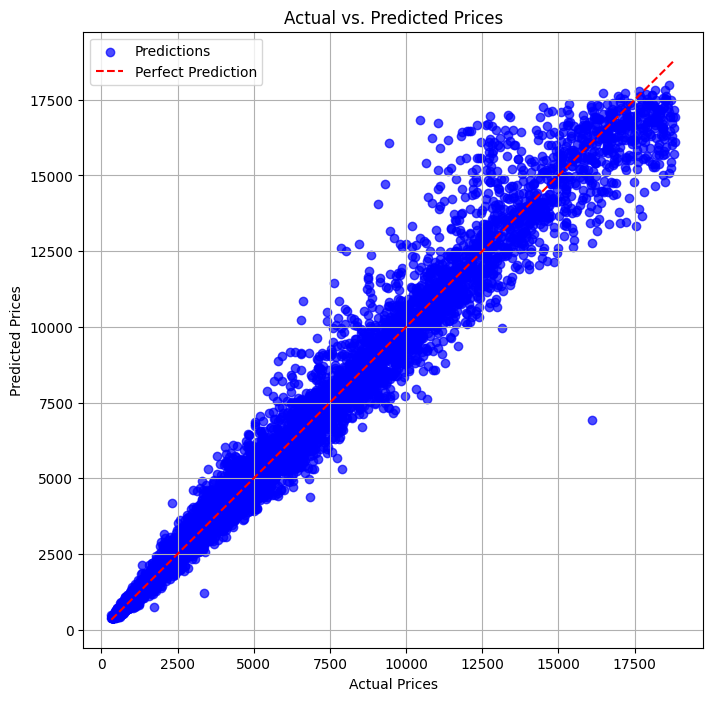

In [82]:
plt.figure(figsize = (8, 8))
plt.scatter(y_test, y_pred, alpha = 0.7, color = 'blue', label = 'Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red', linestyle = '--', label = 'Perfect Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()